In [53]:
import os

import pandas as pd
from matplotlib import pyplot as plt

datadir = "models-full"
plot_save_dir = os.path.join("report", "plots")
# walk the dir

csvs = []
for root, dirs, files in os.walk(datadir):
    for file in files:
        if os.path.basename(root).startswith("."):
            continue
        if file.endswith(".csv"):
            csvs.append(os.path.join(root, file))

print(csvs)
dfs = {}
for f in csvs:
    try:
        dfs[f] = pd.read_csv(f)
    except:
        continue

['models-full/beatles/model_LSTM_beatles_WS-25_ST-7_BS-2500_HS-512-512_DR-0.5_LR-0.001/history.csv', 'models-full/beatles/model_LSTM_beatles_WS-10_ST-7_BS-2500_HS-512-512_DR-0.5_LR-0.001/history.csv', 'models-full/beatles/model_LSTM_beatles_WS-10_ST-3_BS-2500_HS-256_DR-0.5_LR-0.001/history.csv', 'models-full/beatles/model_RNN_beatles_WS-35_ST-3_BS-2500_HS-512_DR-0.5_LR-0.001/history.csv', 'models-full/beatles/model_RNN_beatles_WS-10_ST-7_BS-2500_HS-512_DR-0.5_LR-0.001/history.csv', 'models-full/beatles/model_LSTM_beatles_WS-25_ST-7_BS-2500_HS-512_DR-0.5_LR-0.001/history.csv', 'models-full/beatles/model_LSTM_beatles_WS-35_ST-7_BS-2500_HS-256-256_DR-0.5_LR-0.001/history.csv', 'models-full/beatles/model_RNN_beatles_WS-10_ST-7_BS-2500_HS-256_DR-0.5_LR-0.001/history.csv', 'models-full/beatles/model_LSTM_beatles_WS-10_ST-3_BS-2500_HS-256-256_DR-0.5_LR-0.001/history.csv', 'models-full/beatles/model_RNN_beatles_WS-10_ST-3_BS-2500_HS-512_DR-0.5_LR-0.001/history.csv', 'models-full/beatles/model_

In [54]:
def plot_multiple(df, metric, title, savedir="plots"):
    os.makedirs(plot_save_dir, exist_ok=True)
    plt.plot(df.index, df[metric], label=title)
    # plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.legend()
    # plt.savefig(os.path.join(savedir, "_".join(title.split(" ")) + "_" + metric))
    # plt.show()


# for title, df in dfs.items():
def get_multiple_plots(model, ws, st, bs, hs, dr, lr, title, metric):
    # 'models-full/beatles/model_RNN_beatles_WS-35_ST-7_BS-2500_HS-256-256_DR-0.5_LR-0.001/history.csv
    frmt_str = "models-full/beatles/model_%s_beatles_WS-%d_ST-%d_BS-%d_HS-%s_DR-%1.1f_LR-%1.3f/history.csv"
    hs = "-".join(list(map(lambda x: str(x), hs)))
    fn = frmt_str % (model, ws, st, bs, hs, dr, lr)
    df = dfs[fn]

    if model == "RNN":
        model = "SimpleRNN"

    title = "%s, Window %d, Stride %d, Hidden State Configuration %s" % (
        model,
        ws,
        st,
        hs,
    )
    plot_multiple(df, metric, title)


# " ".join(os.path.basename(title).split(".")[0].split("_")[1:]

In [ ]:
# - RNN WS35 ST3 BS2500 HS-512 DR00.5
# - RNN WS10 ST3 BS2500 HS-512 DR00.5
# - RNN WS35 ST3 BS2500 HS-512,512 DR00.5
# - RNN WS10 ST3 BS2500 HS-512,512 DR00.5
for metric in ["acc", "loss"]:
    plt.figure(figsize=(10, 6))
    plt.title("All Models: " + metric)
    get_multiple_plots("RNN", 10, 3, 2500, [512], 0.5, 0.001, "Model 1", metric)
    get_multiple_plots("RNN", 10, 3, 2500, [256, 256], 0.5, 0.001, "Model 2", metric)
    get_multiple_plots("RNN", 35, 7, 2500, [512], 0.5, 0.001, "Model 3", metric)
    get_multiple_plots("RNN", 35, 7, 2500, [256, 256], 0.5, 0.001, "Model 4", metric)
    get_multiple_plots("LSTM", 10, 3, 2500, [512], 0.5, 0.001, "Model 5", metric)
    get_multiple_plots("LSTM", 10, 3, 2500, [256, 256], 0.5, 0.001, "Model 6", metric)
    get_multiple_plots("LSTM", 35, 7, 2500, [512], 0.5, 0.001, "Model 7", metric)
    get_multiple_plots("LSTM", 35, 7, 2500, [256, 256], 0.5, 0.001, "Model 8", metric)
    plt.savefig(os.path.join(plot_save_dir, "models_all_"+metric + ".png"))
    plt.show()

In [ ]:
def plot(df, metric, title, savedir="plots"):
    plt.figure(figsize=(10, 6))
    os.makedirs(savedir, exist_ok=True)
    plt.plot(df.index, df[metric], label=title)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.savefig(os.path.join(plot_save_dir, "_".join(title.split(" ")) + "_" + metric))
    plt.show()


# for title, df in dfs.items():
def get_plot(model, ws, st, bs, hs, dr, lr, title, metric):
    # 'models-full/beatles/model_RNN_beatles_WS-35_ST-7_BS-2500_HS-256-256_DR-0.5_LR-0.001/history.csv
    frmt_str = "models-full/beatles/model_%s_beatles_WS-%d_ST-%d_BS-%d_HS-%s_DR-%1.1f_LR-%1.3f/history.csv"
    hs = "-".join(list(map(lambda x: str(x), hs)))
    fn = frmt_str % (model, ws, st, bs, hs, dr, lr)
    df = dfs[fn]

    if model == "RNN":
        model = "SimpleRNN"

    title = "%s, Window %d, Stride %d, Hidden State Configuration %s" % (
        model,
        ws,
        st,
        hs,
    )
    plot(df, metric, title, plot_save_dir)

In [ ]:
for metric in ["acc", "loss"]:
    get_plot("RNN", 10, 3, 2500, [512], 0.5, 0.001, "Model 1", metric)
    get_plot("RNN", 10, 3, 2500, [256, 256], 0.5, 0.001, "Model 2", metric)
    get_plot("RNN", 35, 7, 2500, [512], 0.5, 0.001, "Model 3", metric)
    get_plot("RNN", 35, 7, 2500, [256, 256], 0.5, 0.001, "Model 4", metric)
    get_plot("LSTM", 10, 3, 2500, [512], 0.5, 0.001, "Model 5", metric)
    get_plot("LSTM", 10, 3, 2500, [256, 256], 0.5, 0.001, "Model 6", metric)
    get_plot("LSTM", 35, 7, 2500, [512], 0.5, 0.001, "Model 7", metric)
    get_plot("LSTM", 35, 7, 2500, [256, 256], 0.5, 0.001, "Model 8", metric)

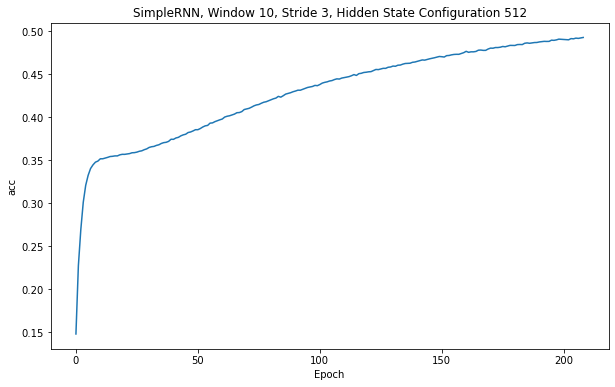

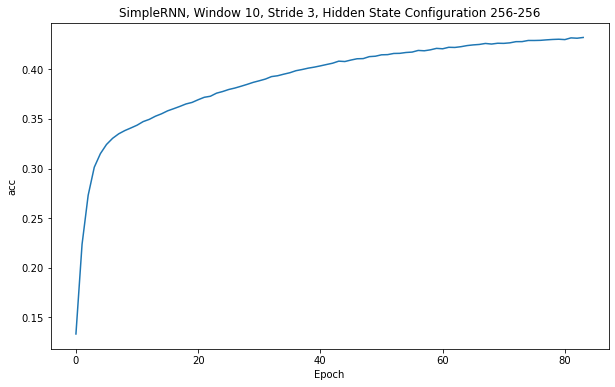

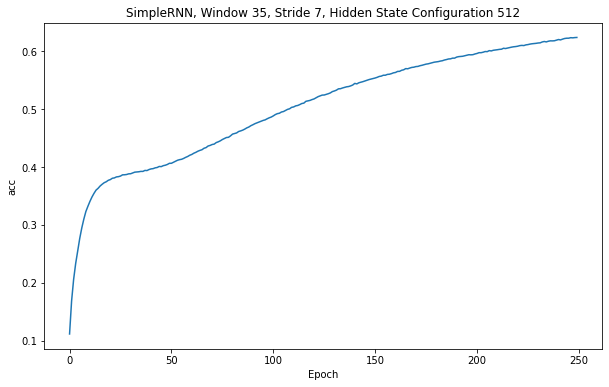

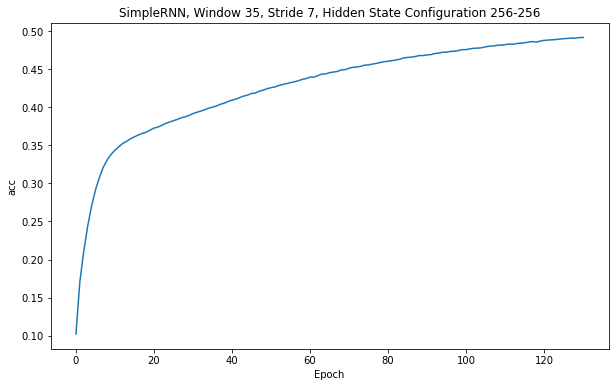

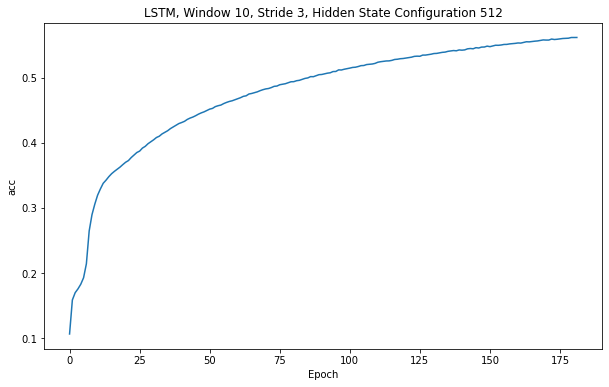

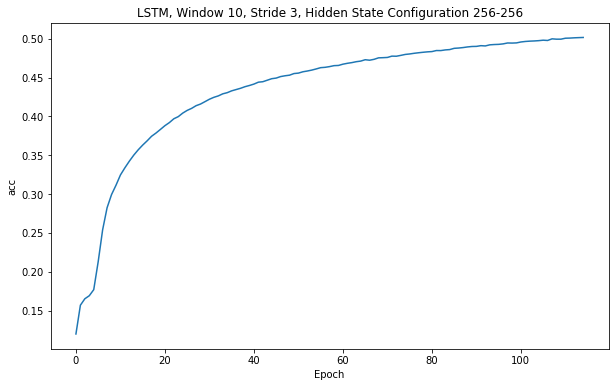

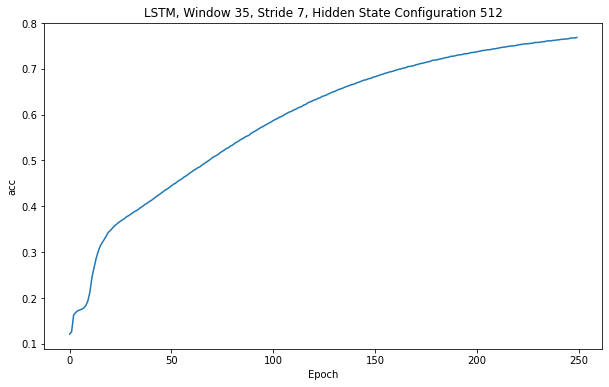

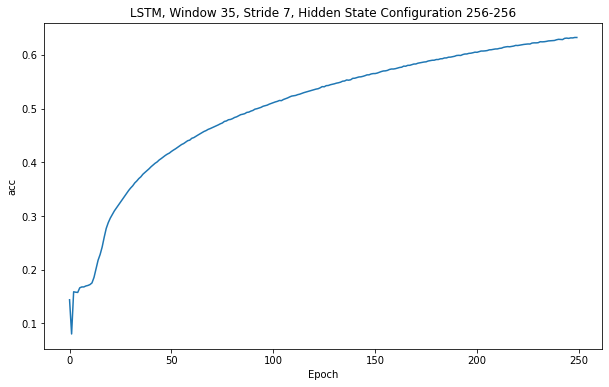

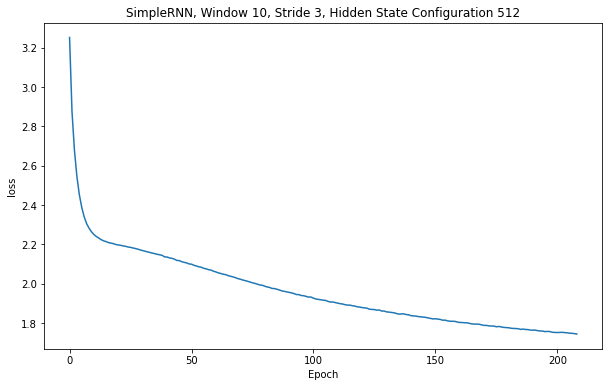

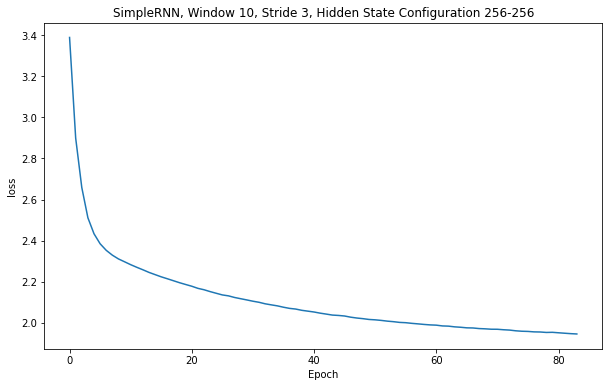

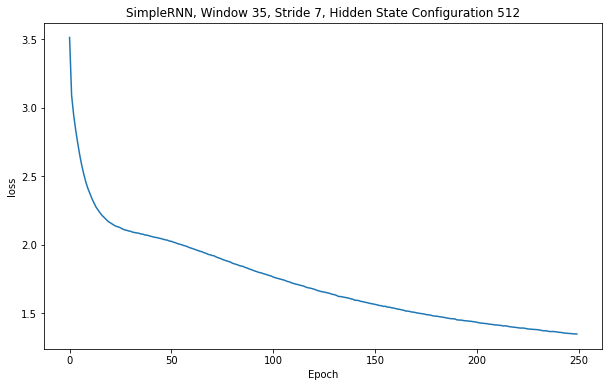

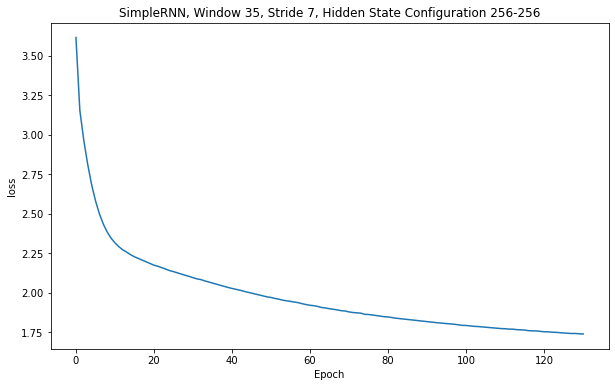

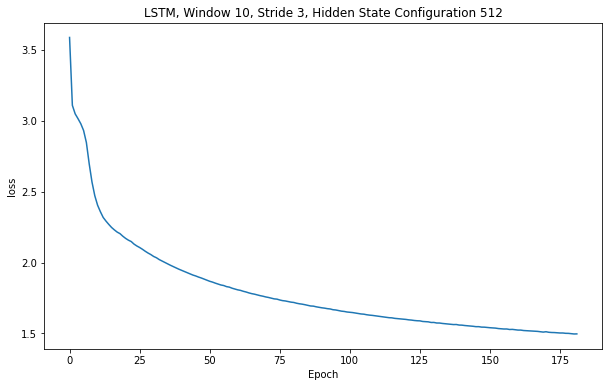

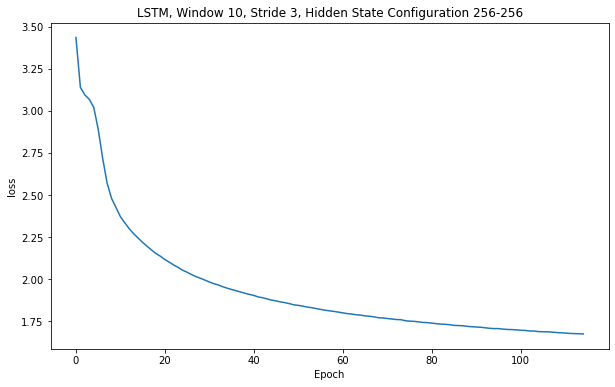

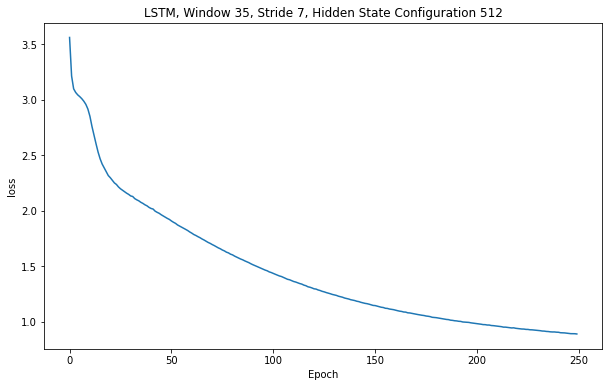

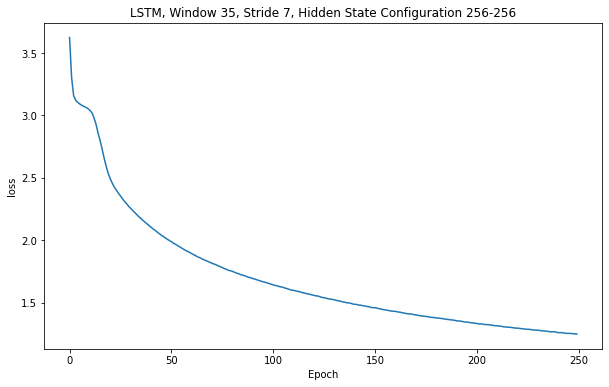

In [63]:
for metric in ["acc", "loss"]:
    get_plot("RNN", 10, 3, 2500, [512], 0.5, 0.001, "Model 1", metric)
    get_plot("RNN", 10, 3, 2500, [256, 256], 0.5, 0.001, "Model 2", metric)
    get_plot("RNN", 35, 7, 2500, [512], 0.5, 0.001, "Model 3", metric)
    get_plot("RNN", 35, 7, 2500, [256, 256], 0.5, 0.001, "Model 4", metric)
    get_plot("LSTM", 10, 3, 2500, [512], 0.5, 0.001, "Model 5", metric)
    get_plot("LSTM", 10, 3, 2500, [256, 256], 0.5, 0.001, "Model 6", metric)
    get_plot("LSTM", 35, 7, 2500, [512], 0.5, 0.001, "Model 7", metric)
    get_plot("LSTM", 35, 7, 2500, [256, 256], 0.5, 0.001, "Model 8", metric)